<a href="https://colab.research.google.com/github/vinkharisma/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

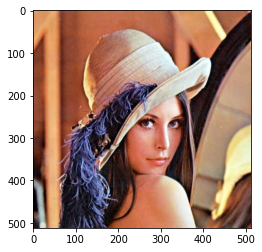

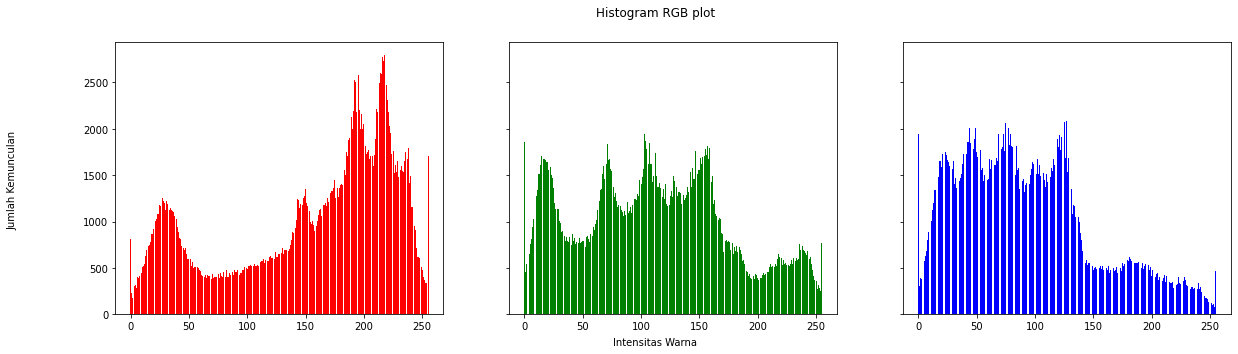

In [19]:
# Input image
# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
plt.imshow(img1)
height, width, depth = np.shape(img)
hs = np.arange(256)

# Inisialisasi
blue = [0] * 256
green = [0] * 256
red = [0] * 256

# Looping untuk menghitung jumlah kemunculan setiap nilai pixel warna pada suatu citra dalam bentuk matriks
for y in range(0, height):
  for x in range(0, width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

hs = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)

# Judul 
fig.suptitle('Histogram RGB plot')

# Sumbu y
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

# Sumbu x
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Membuat grafik
axs[0].bar(hs, red, color='red')
axs[1].bar(hs, green, color='green')
axs[2].bar(hs, blue, color='blue')


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram. Bandingkan hasilnya. Apakah output muncul sama?

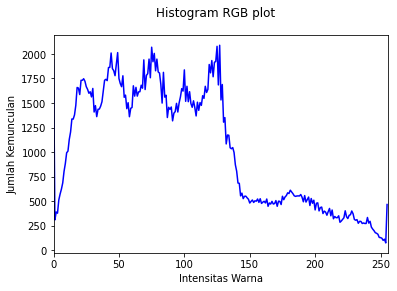

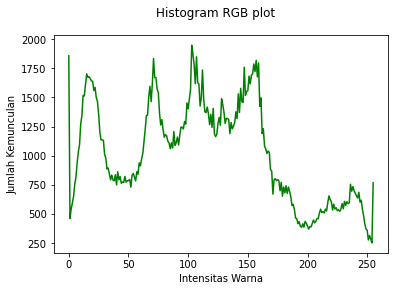

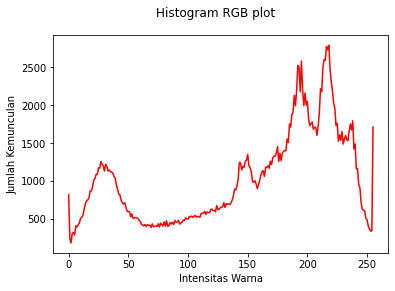

In [26]:
colors = ("b", "g", "r")
channel_ids = (0, 1, 2)

# Histogram
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.suptitle('Histogram RGB plot')
  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah Kemunculan")

  plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

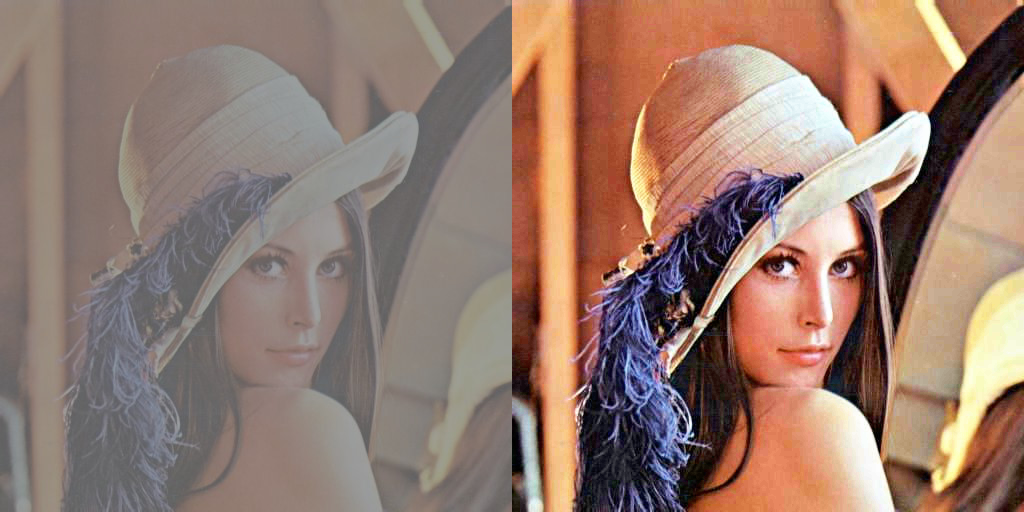

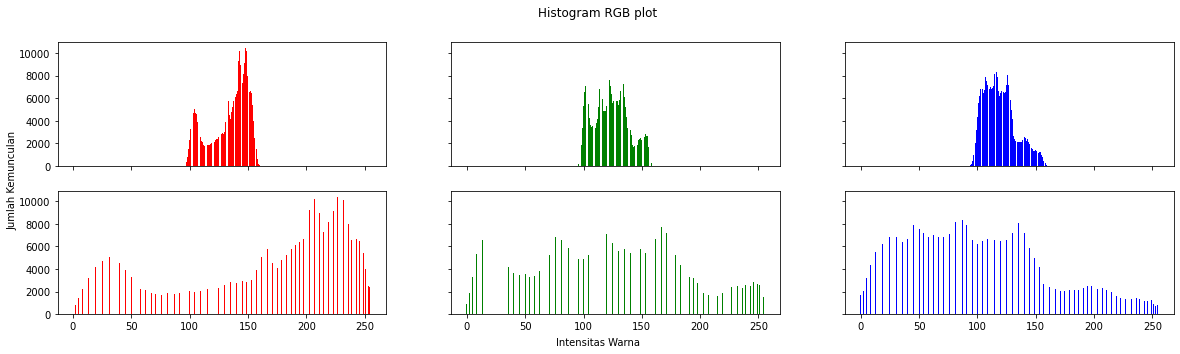

In [30]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histogram_asli = histog(img)

# Menconvert ke Numpy array
img_array = np.asarray(img)

# Normalized cumulative histogram
# Flatten image array and calculate histogram dg binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

# Normalized cumulative histogram 
cum_histo = np.cumsum(histogram_array)

# Pixel mapping lookup table
transform_map = np.floor(255 * cum_histo). astype (np.uint8)

# Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

hs = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(hs, histogram_asli[2], color='red') 
  axs[0,1].bar(hs, histogram_asli[1], color='green') 
  axs[0,2].bar(hs, histogram_asli[0], color='blue') 
  axs[1,0].bar(hs, equal_histo[2], color='red') 
  axs[1,1].bar(hs, equal_histo[1], color='green')
  axs[1,2].bar(hs, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(hs, histogram_asli[2], color='gray') 
  axs[0,1].bar(hs, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu "equalizeHist". Bandingkan hasilnya. Apakah output muncul sama?

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!